In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

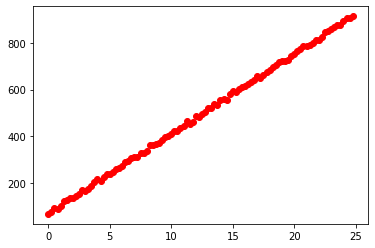

[[1.  ]
 [1.25]]


In [2]:
x=np.arange(0,25,0.25)
y=[]
for i in x:
    y.append(34*i+63+np.random.randint(0,20))
x=np.reshape(x,(100,1))
y=np.reshape(y,(100,1))
plt.plot(x,y,'ro')
plt.show()
print((np.append(1,x[5]).reshape(2,1)))

In [3]:
size=np.size(x) # size of dataset
features=np.size(x[1])
print(size,' ',features)

100   1


In [24]:
def learner(lamda, err):
    converged=False
    i=0
    theta=np.random.randn(features+1,1)
    h=lambda x: np.dot(theta.transpose(),x)
    while not converged:
        # we use lasso regression here
        loss=0
        suma=0
        for n in range(0,size):
            loss+=(h(np.append(1,x[n]).reshape(features+1,1))-y[n])**2/2
        for n in range(0,features+1):
            suma+=abs(theta[n])
        loss=loss+lamda*suma
        s=lambda rho,z: (rho-abs(lamda)) if rho>abs(lamda) else 0
        if i<size and loss>err:
            for j in range(0,features+1):
                rho=0
                z=0
                for k in range(0,size):
                    xtemp=np.append(1,x[k]).reshape(features+1,1)
                    # print(xtemp)
                    rho+=-x[k]*(h(xtemp)-y[k]-theta[j]*x[j])
                    z+=x[k]**2
                theta[j]=s(rho,z)/z
            print('iteration:',i+1,' loss:',loss)
            i+=1
        else:
            converged=True
            print('converged. loss:',loss)
    return theta

In [33]:
result=learner(10**(-10),5)

iteration: 1  loss: [[14887744.66001454]]
iteration: 2  loss: [[16919.44601123]]
iteration: 3  loss: [[12707207.82506982]]
iteration: 4  loss: [[122766.87208131]]
iteration: 5  loss: [[10939676.36643831]]
iteration: 6  loss: [[334921.82265725]]
iteration: 7  loss: [[9545772.03745949]]
iteration: 8  loss: [[602467.28669234]]
iteration: 9  loss: [[8439352.20426589]]
iteration: 10  loss: [[892135.3273319]]
iteration: 11  loss: [[7555461.83619064]]
iteration: 12  loss: [[1182747.927665]]
iteration: 13  loss: [[6845006.77940636]]
iteration: 14  loss: [[1461389.77946286]]
iteration: 15  loss: [[6270654.97160418]]
iteration: 16  loss: [[1720726.15229959]]
iteration: 17  loss: [[5803836.28988932]]
iteration: 18  loss: [[1957131.48175634]]
iteration: 19  loss: [[5422540.46596339]]
iteration: 20  loss: [[2169391.58587809]]
iteration: 21  loss: [[5109695.22317931]]
iteration: 22  loss: [[2357810.62356294]]
iteration: 23  loss: [[4851967.15361479]]
iteration: 24  loss: [[2523602.6539167]]
iteratio

[[18.48805015]
 [18.77185618]]


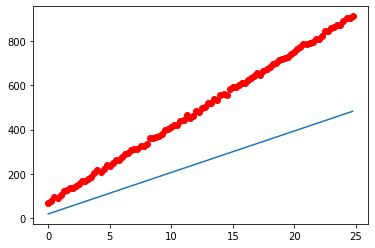

In [35]:
pred=[]
for i in range(0,size):
    pred.append(np.dot(result.transpose(),np.append(1,x[i]).reshape(features+1,1)))
print(result)
plt.plot(x,np.reshape(pred,(-1,1)))
plt.plot(x,y,'ro')
plt.show()